# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [1]:
%matplotlib inline

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import random

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [5]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

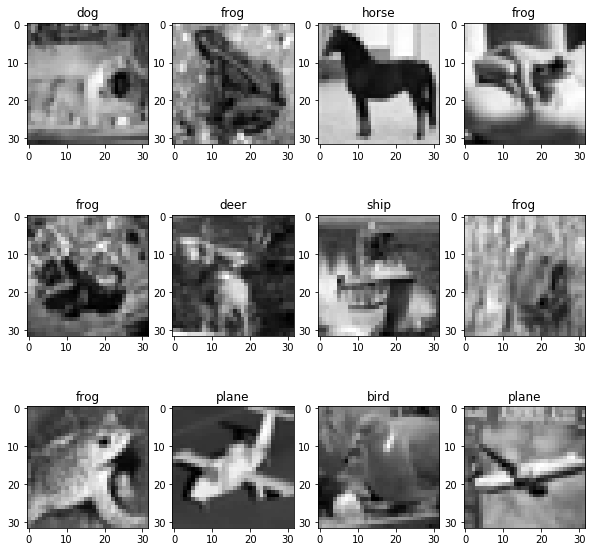

In [6]:
# Mostrar imagens

fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    image_index = random.randint(0, len(dataset_train))
    label = grayscale_dataset_train[image_index][1]
    npimg = grayscale_dataset_train[image_index][0]

    fig.add_subplot(rows, columns, i)
    
    plt.imshow(npimg, cmap='gray')
    plt.title(label)
    
plt.show()

In [7]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [8]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [24]:
class Perceptron(object):
    
    def __init__(self, neta=0.001):
        self.neta = neta
        self.weights = (np.random.rand(1,size) - 0.5)[0]
        bias = (np.random.rand(1) - 0.5) 
        self.weights = np.append(self.weights, bias) 
        self.accuracies = []
        self.losses = []
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def predict(self, inputs):
        o = np.dot(inputs, self.weights)
        y = self.sigmoid(o)
        return y
    

    def evaluate(self, dataset):
        hits = 0
        for image,label in dataset:
            image = np.append(image, 1)
            # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
            y = self.predict(image)

            if(y >= 0.5 and label == 1):
                hits += 1

            elif(y < 0.5 and label == 0):
                hits += 1

        accuracy = hits / len(dataset)
        return accuracy
    
    
    def train(self, dataset, epochs=100, verbose="not_verbose"):
        np.random.shuffle(dataset)

        for epoch in range(epochs):
            hits = 0
            loss = 0
            for image, label in dataset:
                image = np.append(image, 1)
                
                y = self.predict(image)
                reward = 1
                
                    
                if label == 1:
                    reward = 10
                    
                if(y >= 0.5 and label == 1):
                    hits += 1
                    
                    
                
                    

                elif(y < 0.5 and label == 0):
                    hits += 1

                delta_weights = self.neta * (label - y) * image * y * (1 - y) * reward
                self.weights += delta_weights
                loss += (label - y)**2

            accuracy = hits / len(linear_dataset_train)
            self.accuracies = np.append(self.accuracies, accuracy)
            self.losses = np.append(self.losses, loss)

            if(verbose == "verbose"):
                print("%5.0f %12f %15f" %(epoch+1, accuracy, loss))
                #print(epoch,"\t", accuracy, "\t", loss)
            
    
    def plotResults(self):
        plt.plot(self.accuracies)
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title("Training Accuracy")
        plt.show()

        plt.plot(self.losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training Loss")
        plt.show()

# Treinando o perceptron

In [10]:
p0 = Perceptron()
p0.train(linear_dataset_train, 50, "verbose")

    1     0.435100    24291.493146
    2     0.442460    22232.026509
    3     0.441480    21591.728234
    4     0.440040    21225.234191
    5     0.439420    20969.675631
    6     0.438060    20773.626868
    7     0.437760    20616.655062
    8     0.437160    20488.111881
    9     0.436760    20381.187903
   10     0.436360    20291.038190
   11     0.436140    20214.061596
   12     0.435880    20147.538846
   13     0.435640    20089.402614
   14     0.435400    20038.072606
   15     0.435260    19992.332789
   16     0.435080    19951.239712
   17     0.435160    19914.054386
   18     0.435040    19880.191902
   19     0.435300    19849.184218
   20     0.435200    19820.652626


KeyboardInterrupt: 

In [11]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?

# A acurácia no conjunto de treino é maior devido ao overfitting do conjunto de treinamento.
# Analogamente, a acurácia do conjunto de teste é menor justamente pelo fato de que as imagens do 
# conjunto de teste nunca foram apresentadas ao modelo.

accuracy_train = p0.evaluate(linear_dataset_train)
accuracy_test = p0.evaluate(linear_dataset_test)

print("Train Accuracy: ", accuracy_train, "\tTest Accuracy: ", accuracy_test)


Train Accuracy:  0.73144 	Test Accuracy:  0.7247


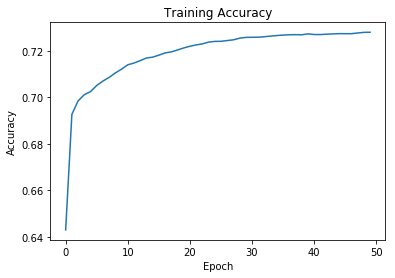

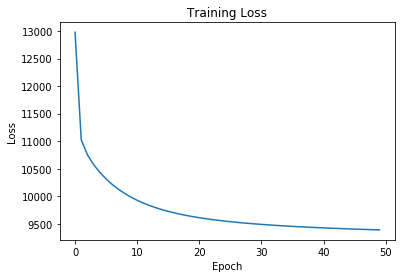

In [12]:
# Caso queiram plotar alguma coisa

p0.plotResults()


# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [11]:
def classes_get(x):
    return {
        0: "plane",
        1: "car",
        2: "bird",
        3: "cat",
        4: "deer",
        5: "dog",
        6: "frog",
        7: "horse",
        8: "ship",
        9: "truck",
    }[x]

In [12]:
# converter para vetores 1D

linear_dataset_array_train = [[] for i in range(10)]
linear_dataset_array_test = [[] for i in range(10)]

for index in range(10):
    
    target_labels = classes_get(index)
    for img,category in grayscale_dataset_train:
        linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
        #linear_img = img
        if category in target_labels:
            label = 1
        else:
            label = 0
        linear_dataset_array_train[index].append((linear_img,label))

    
    
    for img,category in grayscale_dataset_test:
        linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
        #linear_img = img
        if category in target_labels:
            label = 1
        else:
            label = 0
        linear_dataset_array_test[index].append((linear_img,label))
    

In [13]:
print(len(linear_dataset_array_train))
print(len(linear_dataset_array_train[0]))

print(len(linear_dataset_array_test))
print(len(linear_dataset_array_test[0]))

10
50000
10
10000


############################################
Training Perceptron 0
    1     0.485520    16813.968658
    2     0.523080    15088.947617
    3     0.543640    14228.382800
    4     0.558860    13699.090521
    5     0.569400    13349.912492
    6     0.578220    13101.155817
    7     0.584840    12913.242065
    8     0.590220    12765.397297
    9     0.594580    12645.765988
   10     0.598900    12547.012541
   11     0.602280    12464.267534
   12     0.605140    12394.111570
   13     0.607900    12334.039425
   14     0.609820    12282.157868
   15     0.611740    12237.003531
   16     0.612780    12197.426156
   17     0.614520    12162.509727
   18     0.616360    12131.516953
   19     0.617560    12103.848980
   20     0.618620    12079.015475
   21     0.619760    12056.612053
   22     0.620700    12036.302992
   23     0.621480    12017.807872
   24     0.622280    12000.891132
   25     0.622700    11985.353853
   26     0.623400    11971.027223
   27     0.623780    1

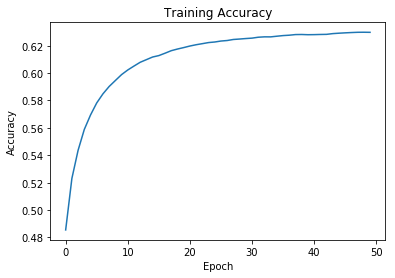

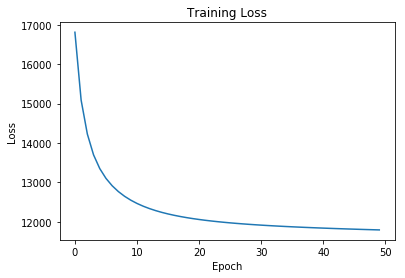




############################################
Training Perceptron 1
    1     0.653740    12098.342543
    2     0.696020    10793.244994
    3     0.703780    10476.944969
    4     0.707660    10314.039471
    5     0.709880    10214.724709
    6     0.710940    10145.418911
    7     0.712240    10092.676793
    8     0.712620    10050.584304
    9     0.712940    10016.040987
   10     0.712920     9987.152347
   11     0.712500     9962.632286
   12     0.712120     9941.547711
   13     0.711920     9923.194220
   14     0.712400     9907.027976
   15     0.713220     9892.623991
   16     0.713480     9879.648093
   17     0.713660     9867.836747
   18     0.713780     9856.981872
   19     0.714020     9846.919104
   20     0.714600     9837.518585
   21     0.714920     9828.677678
   22     0.715460     9820.315191
   23     0.716200     9812.366789
   24     0.716220     9804.781355
   25     0.716320     9797.518121
   26     0.716500     9790.544394
   27     0.716420  

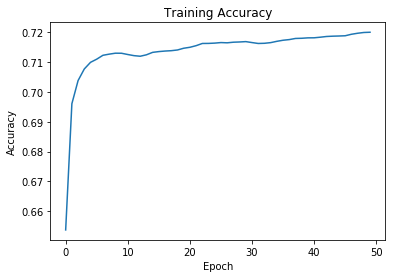

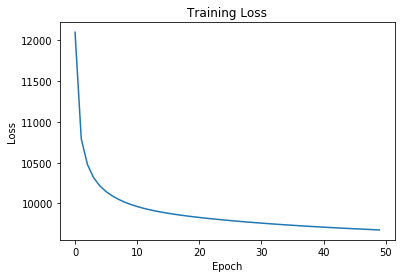




############################################
Training Perceptron 2
    1     0.511640    15489.507319
    2     0.534300    14574.047008
    3     0.535140    14295.466165
    4     0.536280    14109.512949
    5     0.537020    13971.348138
    6     0.538080    13864.078802
    7     0.539220    13778.645079
    8     0.539900    13709.049925
    9     0.540920    13651.108616
   10     0.541460    13601.881673
   11     0.542660    13559.297282
   12     0.543600    13521.883097
   13     0.544320    13488.579325
   14     0.545400    13458.611052
   15     0.546040    13431.401771
   16     0.546740    13406.514794
   17     0.547720    13383.613257
   18     0.548400    13362.432559
   19     0.548920    13342.761137
   20     0.549100    13324.426915
   21     0.549680    13307.287642
   22     0.549800    13291.223934
   23     0.550460    13276.134209
   24     0.550460    13261.930963
   25     0.551060    13248.538001
   26     0.551180    13235.888352
   27     0.551640  

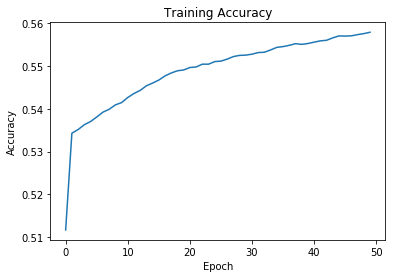

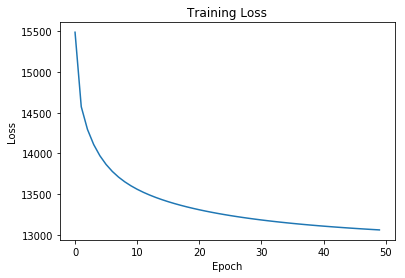




############################################
Training Perceptron 3
    1     0.528860    15680.767935
    2     0.551280    14159.500000
    3     0.550400    13810.135628
    4     0.548900    13607.148867
    5     0.550780    13464.663335
    6     0.551040    13358.087241
    7     0.553360    13275.125632
    8     0.554040    13208.696213
    9     0.554900    13154.310671
   10     0.555580    13108.918191
   11     0.555800    13070.363258
   12     0.556520    13037.092304
   13     0.556500    13007.971723
   14     0.557240    12982.165571
   15     0.558260    12959.050496
   16     0.558620    12938.155871
   17     0.558620    12919.121493
   18     0.559100    12901.667640
   19     0.559820    12885.573797
   20     0.559960    12870.663480
   21     0.560380    12856.793336
   22     0.560460    12843.845260
   23     0.561180    12831.720648
   24     0.561580    12820.336162
   25     0.561780    12809.620583
   26     0.562000    12799.512444
   27     0.562260  

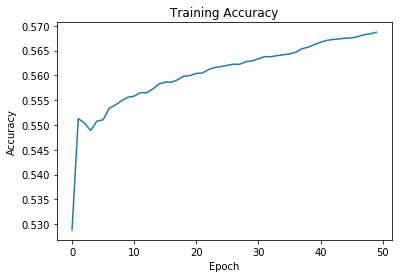

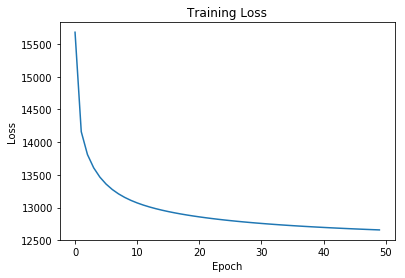




############################################
Training Perceptron 4
    1     0.548000    15024.467976
    2     0.542920    14524.919953
    3     0.546760    14133.558913
    4     0.550560    13918.752188
    5     0.551860    13777.782866
    6     0.553060    13673.009927
    7     0.554080    13589.253899
    8     0.555280    13519.456653
    9     0.556520    13459.813048
   10     0.558120    13407.987225
   11     0.558280    13362.393581
   12     0.558300    13321.879219
   13     0.558920    13285.569283
   14     0.559840    13252.782765
   15     0.560160    13222.981098
   16     0.560760    13195.733620
   17     0.561480    13170.692767
   18     0.561600    13147.575570
   19     0.562160    13126.149569
   20     0.562860    13106.222001
   21     0.563060    13087.631468
   22     0.563620    13070.241513
   23     0.563840    13053.935649
   24     0.563860    13038.613517
   25     0.564320    13024.187895
   26     0.564900    13010.582378
   27     0.565060  

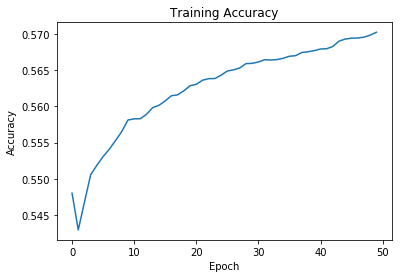

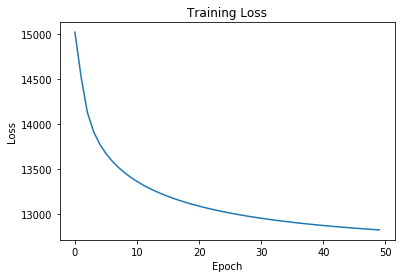




############################################
Training Perceptron 5
    1     0.560640    14224.502432
    2     0.584900    13043.429538
    3     0.588680    12814.450862
    4     0.591620    12668.790682
    5     0.593200    12560.977263
    6     0.595160    12476.924920
    7     0.596360    12409.005892
    8     0.597400    12352.612671
    9     0.598420    12304.823220
   10     0.599320    12263.688609
   11     0.600440    12227.841074
   12     0.600860    12196.276612
   13     0.601620    12168.232141
   14     0.602220    12143.113181
   15     0.602460    12120.448621
   16     0.602540    12099.860547
   17     0.603080    12081.042958
   18     0.603260    12063.746136
   19     0.603880    12047.764854
   20     0.604040    12032.929328
   21     0.604520    12019.098202
   22     0.604680    12006.153052
   23     0.605180    11993.994071
   24     0.605540    11982.536642
   25     0.605680    11971.708610
   26     0.606060    11961.448107
   27     0.606440  

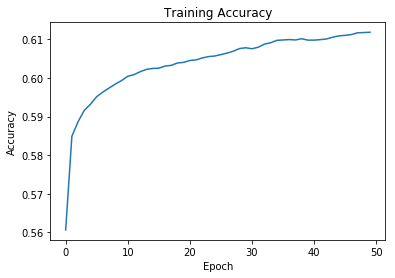

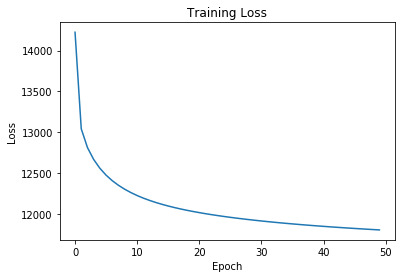




############################################
Training Perceptron 6
    1     0.485820    17339.228456
    2     0.545400    14500.573836
    3     0.560340    14047.177814
    4     0.566560    13808.571011
    5     0.569520    13641.392240
    6     0.571200    13513.785450
    7     0.572080    13413.315713
    8     0.573760    13332.678235
    9     0.575000    13266.808105
   10     0.576340    13212.036492
   11     0.577580    13165.682771
   12     0.578780    13125.783454
   13     0.579000    13090.895780
   14     0.579520    13059.954465
   15     0.580240    13032.167877
   16     0.581260    13006.943134
   17     0.582140    12983.832162
   18     0.582620    12962.492851
   19     0.583140    12942.661026
   20     0.583780    12924.130183
   21     0.584480    12906.736774
   22     0.584760    12890.349485
   23     0.585900    12874.861386
   24     0.586540    12860.184160
   25     0.586520    12846.243835
   26     0.586700    12832.977613
   27     0.586960  

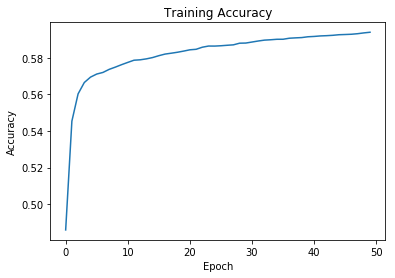

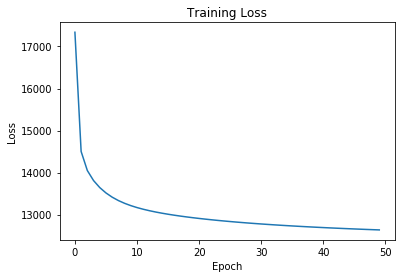




############################################
Training Perceptron 7
    1     0.546420    15226.666753
    2     0.582260    13295.593969
    3     0.589420    12945.339866
    4     0.591580    12782.608004
    5     0.593780    12672.031995
    6     0.595020    12588.273207
    7     0.595900    12522.088273
    8     0.595880    12467.914359
    9     0.596360    12422.147168
   10     0.597540    12382.489610
   11     0.597820    12347.470124
   12     0.598540    12316.116526
   13     0.598860    12287.757365
   14     0.599280    12261.906559
   15     0.599700    12238.196904
   16     0.600160    12216.341037
   17     0.600880    12196.107736
   18     0.601560    12177.306899
   19     0.601400    12159.779623
   20     0.602080    12143.391342
   21     0.602580    12128.026920
   22     0.603000    12113.587012
   23     0.603460    12099.985290
   24     0.603720    12087.146280
   25     0.604000    12075.003649
   26     0.604460    12063.498816
   27     0.604600  

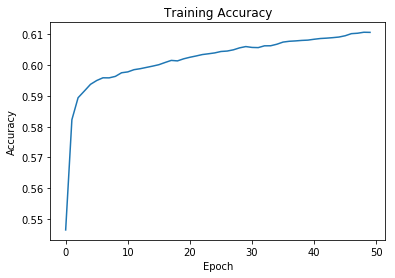

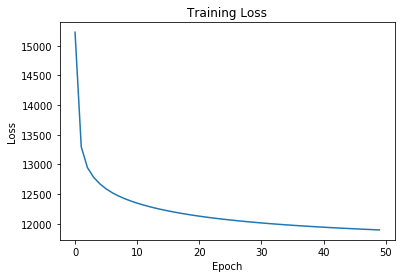




############################################
Training Perceptron 8
    1     0.593580    14309.139117
    2     0.626640    12965.537610
    3     0.636480    12470.094063
    4     0.643260    12121.791902
    5     0.648800    11861.503317
    6     0.653400    11663.274076
    7     0.657380    11509.642565
    8     0.660780    11388.310801
    9     0.663700    11290.687314
   10     0.666440    11210.741376
   11     0.668220    11144.193438
   12     0.669820    11087.968594
   13     0.671620    11039.828020
   14     0.673100    10998.118714
   15     0.674700    10961.602414
   16     0.675440    10929.337841
   17     0.676480    10900.599029
   18     0.677200    10874.818160
   19     0.678000    10851.545129
   20     0.678420    10830.418614
   21     0.679120    10811.145120
   22     0.680100    10793.483621
   23     0.680600    10777.234159
   24     0.681260    10762.229291
   25     0.681880    10748.327583
   26     0.682140    10735.408629
   27     0.682560  

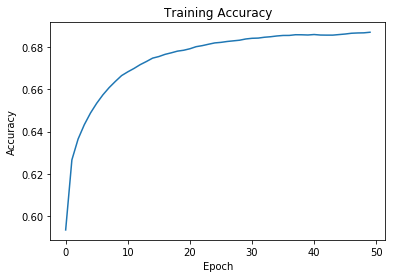

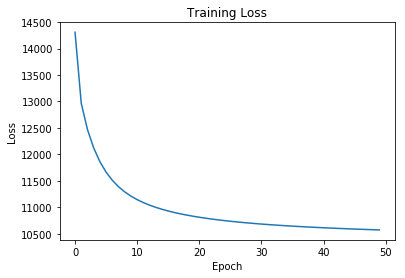




############################################
Training Perceptron 9
    1     0.675040    11637.191006
    2     0.717060    10159.888349
    3     0.724940     9909.339620
    4     0.728520     9778.635130
    5     0.731120     9689.954137
    6     0.732340     9620.836127
    7     0.733900     9562.980947
    8     0.734800     9512.810284
    9     0.735680     9468.519995
   10     0.736060     9429.035946
   11     0.736580     9393.616388
   12     0.737360     9361.692449
   13     0.737740     9332.800550
   14     0.738380     9306.551370
   15     0.739140     9282.613592
   16     0.739980     9260.703770
   17     0.740520     9240.578869
   18     0.741060     9222.030172
   19     0.741300     9204.878108
   20     0.741520     9188.967819
   21     0.741980     9174.165387
   22     0.742440     9160.354658
   23     0.742480     9147.434579
   24     0.742820     9135.316977
   25     0.743280     9123.924698
   26     0.743580     9113.190046
   27     0.743800  

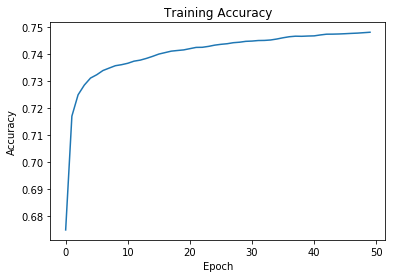

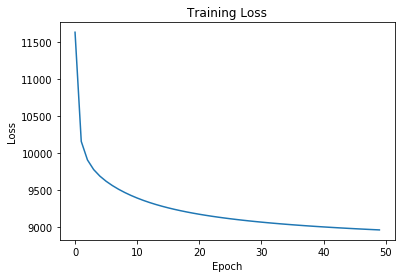

In [25]:

perceptrons = [Perceptron(0.001) for i in range(10)]
index = 0

for p in perceptrons:
    print("############################################")
    print("Training Perceptron", index)

    p.train(linear_dataset_array_train[index], 50, "verbose")

    accuracy_train = p.evaluate(linear_dataset_array_train[index])
    accuracy_test = p.evaluate(linear_dataset_array_test[index])

    print("\nTrain Accuracy: ", accuracy_train, "\tTest Accuracy: ", accuracy_test, "\n")

    p.plotResults()

    print("\n\n")
    index += 1


In [26]:
linear_dataset_test_labels = []

for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    label = classes.index(category)
    linear_dataset_test_labels.append((linear_img,label))


In [27]:
hits = 0
most_active_perceptron = 0

for image,label in linear_dataset_test_labels:
    #print("label:",label)
    image = np.append(image, 1)
    index = 0
    max_output = 0
    #print("=========predictions===========")
    for p in perceptrons:
        result = p.predict(image)
        #print("Result:", result)
        #print("max:", max_output)
        if result > max_output:
            #print("bigger!")
            max_output = result
            most_active_perceptron = index
            #print("most_active:", most_active_perceptron)
        index += 1
    
    #print(most_active_perceptron)
    if label == most_active_perceptron:
        hits += 1
        #print("hit!")
    
    #break
    
accuracy = hits / len(linear_dataset_test_labels)

print(accuracy)

0.2539
